In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from resqu import data, plotter, make_dataset as md

pd.set_option("display.max_columns", None)
# sub_dir = data.data_dir/ "submission"
# team_name = "resourceful-quiver"
# df_v91 = pd.read_parquet(sub_dir / f"{team_name}_v91.parquet")

# df_v126 = pd.read_parquet(sub_dir / f"{team_name}_v126.parquet")

rename_rule = dict(
    deltat="seg_duration",
    full_flight_dist_="flight_duration",
    latitude="latitude_mean",
    longitude="longitude_mean",
    altitude="altitude_mean",
    groundspeed="groundspeed_mean",
    track="track_mean",
    mach="mach_mean",
    TAS="TAS_mean",
    CAS="CAS_mean",
    ff_kgs_est="ff_kgs_est_mean",
    mass_est="mass_est_mean",
    idx_dist="seg_dist",
)
df_best = pd.read_parquet(data.data_dir / "dff_lgb_rank_all_stats_aidana.parquet")
df_best_train = (
    df_best[df_best.dataset == "train"]
    .drop(columns="dataset")
    .rename(columns=rename_rule)
)
df_best_rank = (
    df_best[df_best.dataset == "rank"]
    .drop(columns="dataset")
    .rename(columns=rename_rule)
)

In [ ]:
df_best.columns

Index(['idx', 'fuel_kg', 'deltat', 'ff_kgs', 'typecode', 'source',
       'full_flight_dist_', 'tow_est_kg', 'latitude', 'longitude', 'altitude',
       'groundspeed', 'track', 'vertical_rate_mean', 'mach', 'TAS', 'CAS',
       'phase', 'compute_gs', 'compute_track', 'ff_kgs_est', 'mass_est',
       'idx_dist', 'groundspeed_std', 'vertical_rate_std', 'mach_std',
       'TAS_std', 'CAS_std', 'ff_kgs_est_std', 'mass_est_std',
       'groundspeed_min', 'vertical_rate_min', 'mach_min', 'TAS_min',
       'CAS_min', 'ff_kgs_est_min', 'mass_est_min', 'groundspeed_max',
       'vertical_rate_max', 'mach_max', 'TAS_max', 'CAS_max', 'ff_kgs_est_max',
       'mass_est_max', 'groundspeed_median', 'vertical_rate_median',
       'mach_median', 'TAS_median', 'CAS_median', 'ff_kgs_est_median',
       'mass_est_median', 'm_tow', 'oew', 'min_tow_ch_set', 'max_tow_ch_set',
       'dataset', 'day_of_year', 'hour_takeoff', 'hour_landed'],
      dtype='object')

In [30]:
ver = "best"
in_dir_train = data.data_dir / f"flights_train_preproc_{ver}"
agg_funcs = ["mean", "std"]
split_feat = None
split = 0

df_train = md.make_lgbm_dataset(
    in_dir=in_dir_train,
    flight_set=data.FlightSet.TRAIN,
    agg_funcs=agg_funcs,
    split_feat=split_feat,
    split=split,
)

Processing flights:   0%|          | 0/11037 [00:00<?, ?it/s]

In [38]:
df_train.columns

Index(['idx', 'flight_id', 'start', 'end', 'fuel_kg', 'seg_duration', 'ff_kgs',
       'flight_date', 'aircraft_type', 'takeoff', 'landed', 'flight_duration',
       'tow_est_kg', 'tau_s', 'tau_e', 'full_flight_dist', 'seg_dist', 'phase',
       'latitude_mean', 'latitude_std', 'longitude_mean', 'longitude_std',
       'altitude_mean', 'altitude_std', 'groundspeed_mean', 'groundspeed_std',
       'track_mean', 'track_std', 'vertical_rate_mean', 'vertical_rate_std',
       'mach_mean', 'mach_std', 'TAS_mean', 'TAS_std', 'CAS_mean', 'CAS_std',
       'ts_mean', 'ts_std', 'cumdist_mean', 'cumdist_std', 'distance_km_mean',
       'distance_km_std', 'ff_kgs_est_mean', 'ff_kgs_est_std', 'mass_est_mean',
       'mass_est_std', 'm_tow', 'oew'],
      dtype='object')

In [31]:
df_train.TAS_mean.max(), df_best_train.TAS_mean.max()

(np.float64(772.1083734716561), np.float64(772.1083734716561))

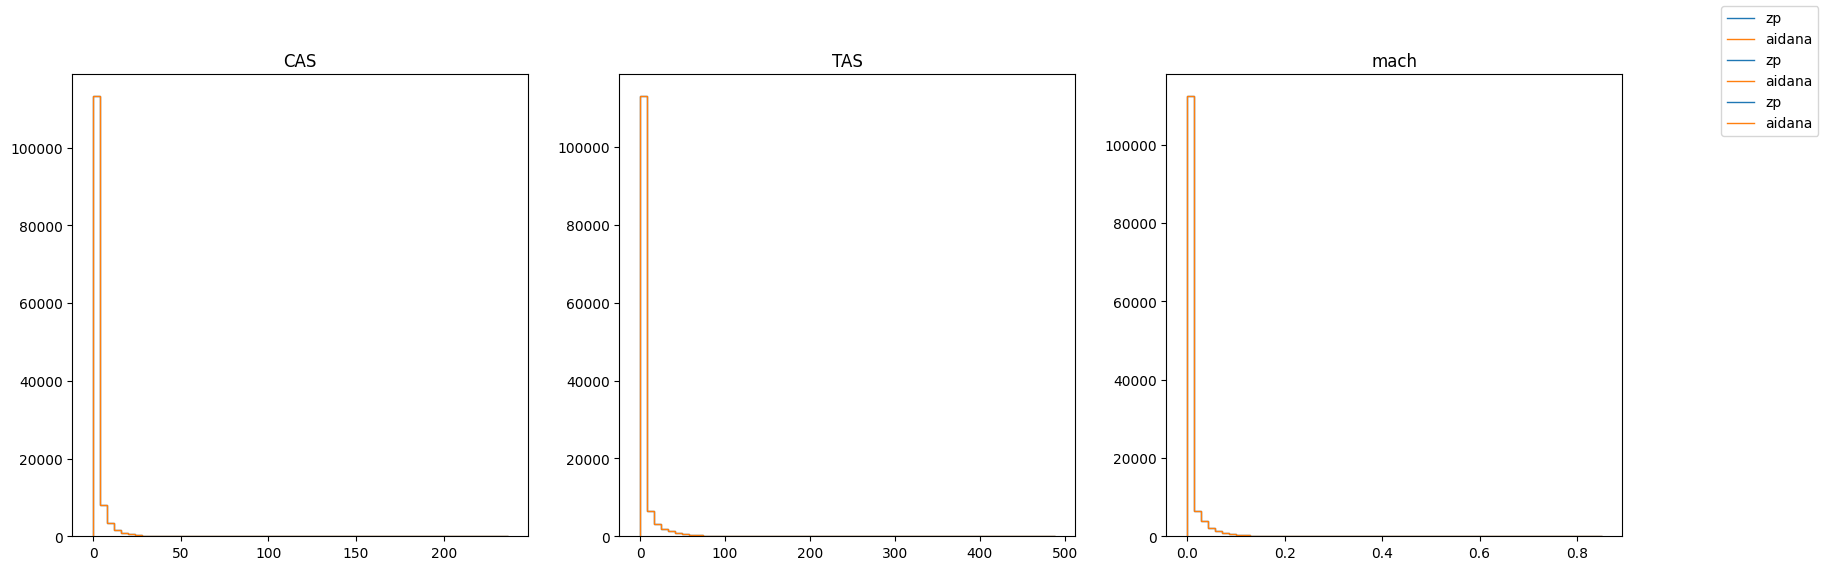

In [ ]:
fig = plt.figure(figsize=(20, 6))
axs = fig.subplots(1, 3)

x1 = df_train.CAS_mean
x2 = df_best_train.CAS_mean
bins = np.linspace(min(x1.min(), x2.min()), max(x1.max(), x2.max()), 60)
hist1, edges = np.histogram(x1, bins=bins)
hist2, _ = np.histogram(x2, bins=bins)
axs[0].stairs(hist1, edges, label="zp")
axs[0].stairs(hist2, edges, label="aidana")
axs[0].set_title("CAS")

x1 = df_train.TAS_mean
x2 = df_best_train.TAS_mean
bins = np.linspace(min(x1.min(), x2.min()), max(x1.max(), x2.max()), 60)
hist1, edges = np.histogram(x1, bins=bins)
hist2, _ = np.histogram(x2, bins=bins)
axs[1].stairs(hist1, edges, label="zp")
axs[1].stairs(hist2, edges, label="aidana")
axs[1].set_title("TAS")


x1 = df_train.mach_mean
x2 = df_best_train.mach_mean
bins = np.linspace(min(x1.min(), x2.min()), max(x1.max(), x2.max()), 60)
hist1, edges = np.histogram(x1, bins=bins)
hist2, _ = np.histogram(x2, bins=bins)
axs[2].stairs(hist1, edges, label="zp")
axs[2].stairs(hist2, edges, label="aidana")
axs[2].set_title("mach")


# ax.hist(edges[:-1], edges, weights=hist1, label='zp')
# ax.hist(edges[:-1], edges, weights=hist2, label='aidana')
# ax.hist(x1, bins=bins, alpha=0.8, label='zp')
# ax.hist(x2, bins=bins, alpha=0.9, label='aidana')
# ax.hist(df_train.groundspeed_mean, 60, alpha=0.6, label='gs')
# ax.set_title("mach")
fig.legend()


In [35]:
df_train.iloc[0].to_frame().transpose()

,idx,flight_id,start,end,fuel_kg,seg_duration,ff_kgs,flight_date,aircraft_type,takeoff,landed,flight_duration,tow_est_kg,tau_s,tau_e,full_flight_dist,seg_dist,phase,latitude_mean,latitude_std,longitude_mean,longitude_std,altitude_mean,altitude_std,groundspeed_mean,groundspeed_std,track_mean,track_std,vertical_rate_mean,vertical_rate_std,mach_mean,mach_std,TAS_mean,TAS_std,CAS_mean,CAS_std,ts_mean,ts_std,cumdist_mean,cumdist_std,distance_km_mean,distance_km_std,ff_kgs_est_mean,ff_kgs_est_std,mass_est_mean,mass_est_std,m_tow,oew
0,0,prc770822360,2025-04-13 02:31:04.447000,2025-04-13 03:01:04.487000,2500.0,1800.04,1.388858,2025-04-12,B789,2025-04-12 16:15:35,2025-04-13 04:33:52,44297.0,213364.550556,0.833678,0.874314,10620.587368,436.214078,CRUISE,46.210868,0.586746,21.948868,1.400326,35989.146039,12.368384,472.224444,4.110138,301.196179,0.560945,-5.955556,48.248794,0.822931,0.007165,472.224444,4.110138,141.102919,1.369239,37769.5,519.75956,4921.250163,68.149071,9114.155303,126.212079,1.629137,0.022544,151832.13014,1235.803606,254000,128000


In [36]:
df_best_train.iloc[0].to_frame().transpose()

,idx,fuel_kg,seg_duration,ff_kgs,typecode,source,flight_duration,tow_est_kg,latitude_mean,longitude_mean,altitude_mean,groundspeed_mean,track_mean,vertical_rate_mean,mach_mean,TAS_mean,CAS_mean,phase,compute_gs,compute_track,ff_kgs_est_mean,mass_est_mean,seg_dist,groundspeed_std,vertical_rate_std,mach_std,TAS_std,CAS_std,ff_kgs_est_std,mass_est_std,groundspeed_min,vertical_rate_min,mach_min,TAS_min,CAS_min,ff_kgs_est_min,mass_est_min,groundspeed_max,vertical_rate_max,mach_max,TAS_max,CAS_max,ff_kgs_est_max,mass_est_max,groundspeed_median,vertical_rate_median,mach_median,TAS_median,CAS_median,ff_kgs_est_median,mass_est_median,m_tow,oew,min_tow_ch_set,max_tow_ch_set,day_of_year,hour_takeoff,hour_landed
24289,0,2500.0,1800.04,1.388858,B789,adsb,10636.569426,213364.550556,46.210868,21.948868,35989.146039,472.224444,301.196179,-5.955556,0.822931,472.224444,141.102919,CRUISE,472.224444,301.196179,1.629137,151832.13014,436.214078,4.110138,48.248794,0.007165,4.110138,1.369239,0.022544,1235.803606,465.0,-64.0,0.810289,465.0,138.733553,1.588611,149056.857915,480.0,64.0,0.836523,480.0,143.736241,1.684504,154672.61009,472.0,0.0,0.822581,472.0,140.999079,1.628952,151738.565917,254000,128000,127632.0,252632.0,102,16,4
